<a href="https://colab.research.google.com/github/Rishabh9559/Data_science/blob/main/Phase%202%3A%20Machine%20Learning%20for%20Data%20Science/Logistic%20Implement/logistic_Regression_Implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




1. Read file

In [10]:
# read file
data=pd.read_csv("/content/diabetes_lyst1753597707540.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
print(data['Insulin'].value_counts())

Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
178      1
127      1
510      1
16       1
112      1
Name: count, Length: 186, dtype: int64


2. Check the null value

In [5]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


3. Data pre-processed

**EDA**

1.  How to tackle 0's in the above features like BP, Insulin, SkinThickness etc.
2.  Outliers -> Specially in insulin (right-skewed distribution)
3.  Feature Selection
4.  Data Standardization [StandardScaler, Min-Max Scaler]
5.  Data Imbalance


Exploratory Data Analysis (EDA) in data science is the process of investigating and summarizing a dataset to understand its main characteristics, discover patterns, and identify potential issues before performing more formal analysis or modeling

4. Data split for training the model

In [12]:
X=data.drop(columns='Outcome', axis=1)
Y=data['Outcome']

X -> Input feature

Y-> Target feature

In [13]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [14]:
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, random_state=44 )

In [27]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [28]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
407,0,101,62,0,0,21.9,0.336,25
765,5,121,72,23,112,26.2,0.245,30
558,11,103,68,40,0,46.2,0.126,42
82,7,83,78,26,71,29.3,0.767,36
165,6,104,74,18,156,29.9,0.722,41
...,...,...,...,...,...,...,...,...
96,2,92,62,28,0,31.6,0.130,24
571,2,130,96,0,0,22.6,0.268,21
173,1,79,60,42,48,43.5,0.678,23
753,0,181,88,44,510,43.3,0.222,26


In [29]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
452,0,91,68,32,210,39.9,0.381,25
370,3,173,82,48,465,38.4,2.137,25
746,1,147,94,41,0,49.3,0.358,27
122,2,107,74,30,100,33.6,0.404,23
614,11,138,74,26,144,36.1,0.557,50
...,...,...,...,...,...,...,...,...
458,10,148,84,48,237,37.6,1.001,51
524,3,125,58,0,0,31.6,0.151,24
43,9,171,110,24,240,45.4,0.721,54
66,0,109,88,30,0,32.5,0.855,38


In [30]:
data['Outcome'].value_counts()
# data Imbalance

,count
Outcome,
0,500
1,268


Data Imbalance solution be-

1. Oversampling (Randomly duplicate examples in the minority class)

2. Undersampling: (Randomly delete examples in the majority class.)

In [31]:
from collections import Counter
Counter(Y_train)

Counter({0: 385, 1: 191})

RandomOverSampler: Randomly duplicating samples from the minority class until both the classes have the same number of samples.

In [32]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

model_over_sampling = RandomOverSampler(random_state=4)
X_train_over, Y_train_over = model_over_sampling.fit_resample(X_train, Y_train)

In [33]:
Counter(Y_train_over)

Counter({0: 385, 1: 385})

here data is balanced

Advanced Over Sampling Techniques: SMOTE and ADASYN (Synthetic Data)

Model Training

In [34]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

model.fit(X_train_over,Y_train_over)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

model prediction

In [35]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [36]:
result_compare=pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred})
result_compare

,Actual,Predicted
452,0,0
370,1,1
746,1,1
122,0,0
614,1,1
...,...,...
458,1,1
524,0,0
43,1,1
66,1,0


In [37]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob

array([[0.82664305, 0.17335695],
       [0.01592371, 0.98407629],
       [0.36759629, 0.63240371],
       [0.76881579, 0.23118421],
       [0.1547215 , 0.8452785 ],
       [0.33101322, 0.66898678],
       [0.4243821 , 0.5756179 ],
       [0.90732516, 0.09267484],
       [0.77234824, 0.22765176],
       [0.6040322 , 0.3959678 ],
       [0.60222632, 0.39777368],
       [0.45276723, 0.54723277],
       [0.87763995, 0.12236005],
       [0.82306336, 0.17693664],
       [0.88247054, 0.11752946],
       [0.11076523, 0.88923477],
       [0.77363898, 0.22636102],
       [0.39421427, 0.60578573],
       [0.92636303, 0.07363697],
       [0.36923394, 0.63076606],
       [0.65268412, 0.34731588],
       [0.1854397 , 0.8145603 ],
       [0.7523534 , 0.2476466 ],
       [0.5457573 , 0.4542427 ],
       [0.96497435, 0.03502565],
       [0.80360138, 0.19639862],
       [0.50031871, 0.49968129],
       [0.46066536, 0.53933464],
       [0.88198167, 0.11801833],
       [0.16444005, 0.83555995],
       [0.

model evalution

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
confusion_matrix(Y_test, y_pred)

array([[96, 19],
       [23, 54]])

In [39]:
recall = recall_score(Y_test, y_pred)
print(recall)

0.7012987012987013


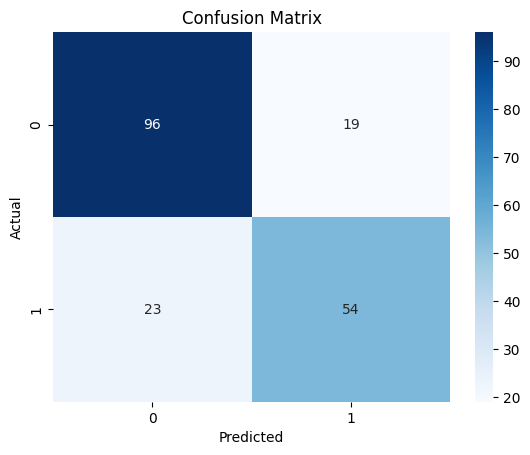

In [40]:
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

/tmp/ipython-input-2458333881.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette='viridis')


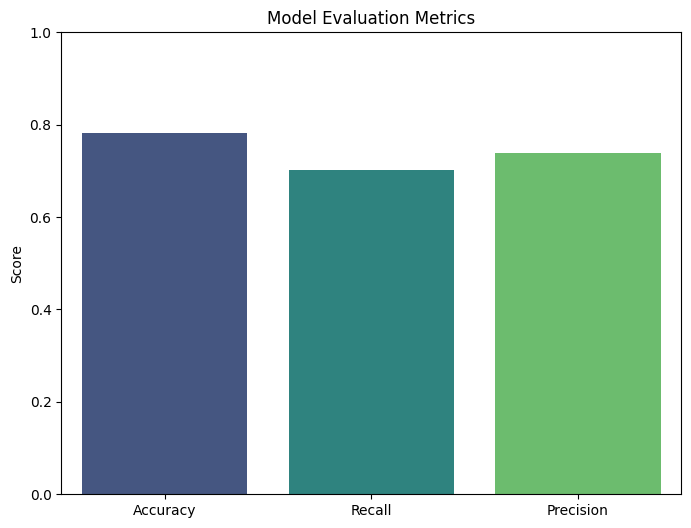

Accuracy: 0.7812
Recall: 0.7013
Precision: 0.7397


In [41]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

accuracy = accuracy_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)

metrics = ['Accuracy', 'Recall', 'Precision']
scores = [accuracy, recall, precision]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette='viridis')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)
plt.show()

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")